Imports sraty pierdaty


In [68]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd


In [69]:
dataFrame = pd.read_csv("processed_dataset.csv")
dataFrame.head()

,Unnamed: 0,Make,Model,Engine Size(L),Cylinders,Fuel Consumption(Hwy (L/100 km)),Drag coefficient
0,0,Acura,ILX,2.4,4,7.0,0.30
1,1,Acura,MDX SH-AWD,3.5,6,9.4,0.37
2,2,Acura,RDX SH-AWD,2.0,4,8.6,0.37
3,3,Acura,RDX SH-AWD A-SPEC,2.0,4,9.1,0.37
4,4,Acura,TLX SH-AWD,2.0,4,8.0,0.30


In [70]:
dataFrame = dataFrame.sort_values(by ='Engine Size(L)')
print(dataFrame.dtypes)

Unnamed: 0                            int64
Make                                 object
Model                                object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Consumption(Hwy (L/100 km))    float64
Drag coefficient                    float64
dtype: object


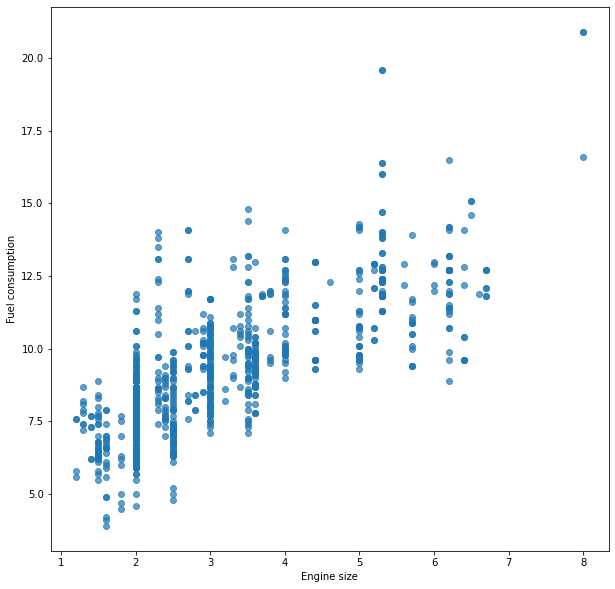

In [71]:
plt.figure(0,figsize=(10,10))
plt.scatter(dataFrame['Engine Size(L)'], dataFrame['Fuel Consumption(Hwy (L/100 km))'],alpha=0.7,marker='o')
plt.xlabel('Engine size')
plt.ylabel('Fuel consumption')
plt.show()

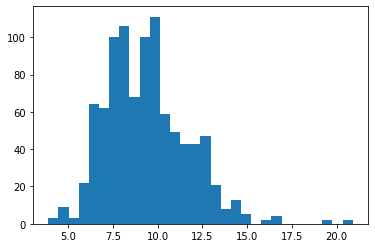

In [72]:
plt.hist(dataFrame["Fuel Consumption(Hwy (L/100 km))"],bins=30)
plt.show()

In [73]:
N = dataFrame.shape[0]
engine_size_data = dataFrame['Engine Size(L)']
cylinders_data = dataFrame['Cylinders']
drag_coeficient_data = dataFrame['Drag coefficient']

In [74]:
model_2_prior=CmdStanModel(stan_file='model_2_prior.stan')

INFO:cmdstanpy:compiling stan file /home/TOOLS/DOCKER/project/data_analitics/model_2_prior.stan to exe file /home/TOOLS/DOCKER/project/data_analitics/model_2_prior
INFO:cmdstanpy:compiled model executable: /home/TOOLS/DOCKER/project/data_analitics/model_2_prior


In [75]:
samples_2_prior = model_2_prior.sample(data = {'N':N, 'engine_size':engine_size_data, 'drag_coeficient':drag_coeficient_data, 'cylinders':cylinders_data},
iter_sampling=N,
iter_warmup=200,
chains=1,
seed=29042020,
refresh=N)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [76]:
dataFrame_model_2_prior = samples_2_prior.draws_pd()
dataFrame_model_2_prior.head()


,lp__,accept_stat__,alpha,beta_engine_size,beta_cylinders,beta_drag_coefficient,sigma,fuel_consumption[1],fuel_consumption[2],fuel_consumption[3],...,fuel_consumption[937],fuel_consumption[938],fuel_consumption[939],fuel_consumption[940],fuel_consumption[941],fuel_consumption[942],fuel_consumption[943],fuel_consumption[944],fuel_consumption[945],fuel_consumption[946]
0,0.0,0.0,27.08170,-12.72270,7.771810,1.27591,0.05289,35.5257,35.5761,35.7218,...,35.4708,35.4220,35.4153,35.4571,35.5879,35.4086,35.4117,50.0523,50.0768,50.0763
1,0.0,0.0,4.57312,-2.16814,16.126900,-11.10080,15.66230,44.0294,84.2326,40.8572,...,181.2550,177.1120,160.5850,169.1700,163.5050,174.8430,200.3530,207.4890,256.7380,255.9340
2,0.0,0.0,1.24858,-7.31857,5.837320,10.53750,5.21143,11.9963,11.8939,10.1300,...,20.1934,36.3753,22.9764,28.4737,28.5045,25.8579,24.0048,33.2105,33.9444,38.7702
3,0.0,0.0,-7.58632,5.13660,6.190190,4.20648,17.76710,20.9525,49.1300,30.8252,...,128.2650,117.0890,115.8680,113.7580,107.0620,100.0980,109.4820,143.1170,124.4300,160.3670
4,0.0,0.0,-26.70620,-23.46890,-0.636581,3.54059,12.33520,-63.9662,-49.7189,-54.2054,...,-205.4580,-207.7670,-202.5030,-196.7720,-191.9640,-171.6360,-175.6110,-237.1190,-235.8610,-220.9960


In [77]:
list = []
for i in range(1,N):
    val = dataFrame_model_2_prior['fuel_consumption[' + str(i)+ ']'].mean()
    list.append(val)


(array([  1.,   0.,   1.,   0.,   0.,   0.,   4.,   5.,   5.,   3.,   1.,
          2.,   5.,  15.,  29.,  49.,  49.,  49.,  41.,  57.,  59.,  85.,
         67.,  82.,  90., 116.,  78.,  35.,  10.,   7.]),
 array([-6.43743823, -6.24989948, -6.06236072, -5.87482197, -5.68728322,
        -5.49974447, -5.31220572, -5.12466697, -4.93712822, -4.74958947,
        -4.56205072, -4.37451197, -4.18697321, -3.99943446, -3.81189571,
        -3.62435696, -3.43681821, -3.24927946, -3.06174071, -2.87420196,
        -2.68666321, -2.49912446, -2.3115857 , -2.12404695, -1.9365082 ,
        -1.74896945, -1.5614307 , -1.37389195, -1.1863532 , -0.99881445,
        -0.8112757 ]),
 <BarContainer object of 30 artists>)

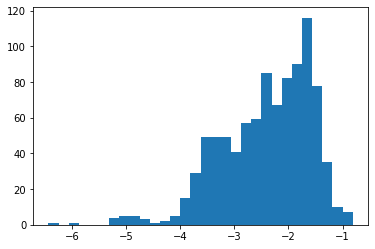

In [78]:
plt.hist(list,bins=30)